In [22]:
from torchvision import models
import torch
from explanable.common.utilize import readImageAndPreprocessing
from explanable.explainmethods.RiseExpl import RiseExplClass
from explanable.visualization.visual import showExplanation
from explanable.metrics.DeletionInsertion import DeletionInsertionClass
from explanable.visualization.visual import showChapter
from explanable.visualization.visual import showByPictures
from explanable.metrics import MorfLerfClass

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
PATH_TO_IMAGE = '../image/cat.jpg'
inputs = readImageAndPreprocessing(PATH_TO_IMAGE)

model = models.resnet50()
model.load_state_dict(torch.load('../pretrainingmodel/resnet50-0676ba61.pth'))
model.eval()
print(len(inputs.shape))

2024-02-14 20:56:34,951 explanable.log INFO img.shape: (1, 3, 224, 224), img.type: <class 'numpy.ndarray'>
2024-02-14 20:56:34,951 explanable.log INFO img.shape: (1, 3, 224, 224), img.type: <class 'numpy.ndarray'>
2024-02-14 20:56:34,951 explanable.log INFO img.shape: (1, 3, 224, 224), img.type: <class 'numpy.ndarray'>


4


2024-02-14 21:17:45,919 explanable.log INFO probaByIndex: (20,) probaWithoutIndex: (20,)
2024-02-14 21:17:45,919 explanable.log INFO probaByIndex: (20,) probaWithoutIndex: (20,)
2024-02-14 21:17:45,919 explanable.log INFO probaByIndex: (20,) probaWithoutIndex: (20,)
2024-02-14 21:17:45,919 explanable.log INFO probaByIndex: (20,) probaWithoutIndex: (20,)
2024-02-14 21:17:45,919 explanable.log INFO probaByIndex: (20,) probaWithoutIndex: (20,)
2024-02-14 21:17:45,919 explanable.log INFO probaByIndex: (20,) probaWithoutIndex: (20,)
2024-02-14 21:17:45,919 explanable.log INFO probaByIndex: (20,) probaWithoutIndex: (20,)
2024-02-14 21:17:45,923 explanable.log INFO result: (224, 224) inputs: (1, 3, 224, 224)
2024-02-14 21:17:45,923 explanable.log INFO result: (224, 224) inputs: (1, 3, 224, 224)
2024-02-14 21:17:45,923 explanable.log INFO result: (224, 224) inputs: (1, 3, 224, 224)
2024-02-14 21:17:45,923 explanable.log INFO result: (224, 224) inputs: (1, 3, 224, 224)
2024-02-14 21:17:45,923 e

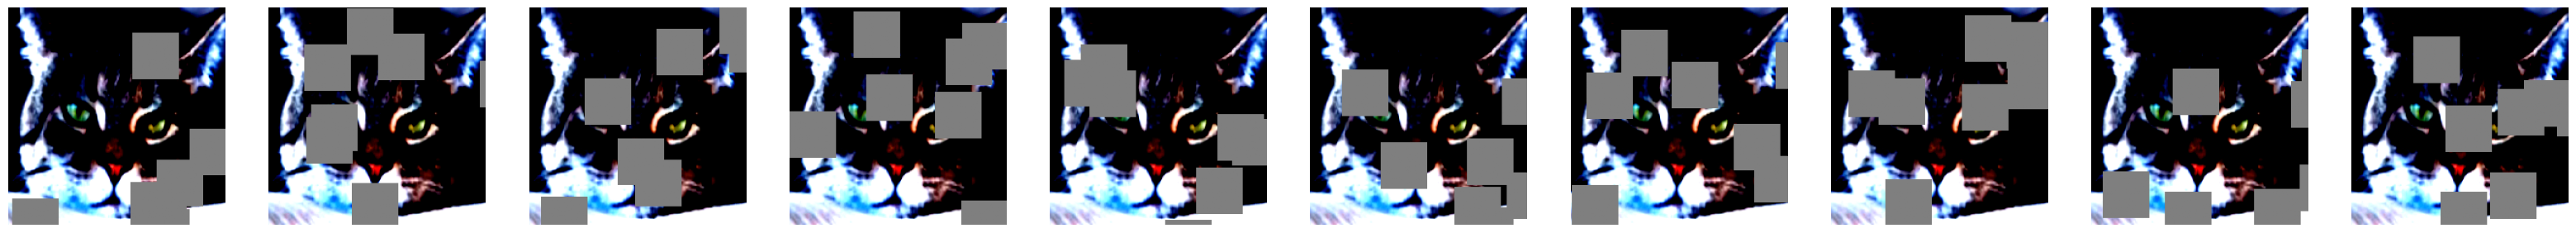

In [19]:
rec = RiseExplClass(model)
rec.explain(inputs)
showByPictures(rec.intermediaResults)

2024-02-14 21:18:49,007 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419848395940269
2024-02-14 21:18:49,007 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419848395940269
2024-02-14 21:18:49,007 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419848395940269
2024-02-14 21:18:49,007 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419848395940269
2024-02-14 21:18:49,007 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419848395940269
2024-02-14 21:18:49,007 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419848395940269
2024-02-14 21:18:49,007 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419848395940269


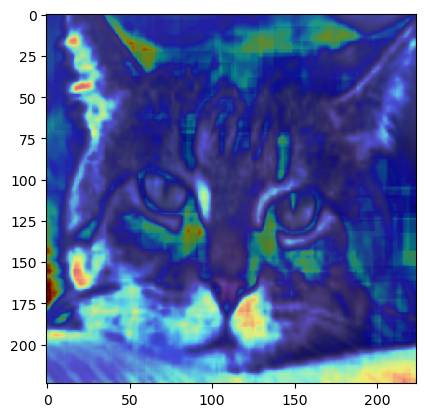

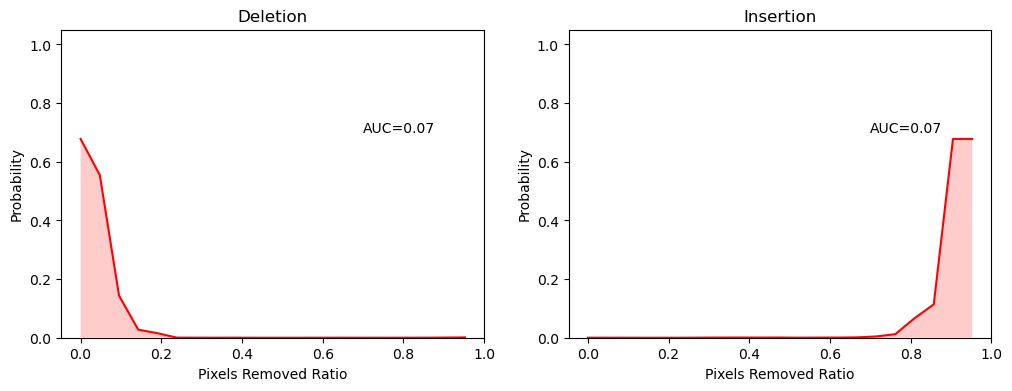

In [21]:
showExplanation(rec.result, PATH_TO_IMAGE)

delIns = DeletionInsertionClass(model)
delIns.setExplanation(rec)
deletion, insertion = delIns.evaluate(inputs)

showChapter(deletion, insertion)

2024-02-14 21:20:17,831 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419586892038274
2024-02-14 21:20:17,831 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419586892038274
2024-02-14 21:20:17,831 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419586892038274
2024-02-14 21:20:17,831 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419586892038274
2024-02-14 21:20:17,831 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419586892038274
2024-02-14 21:20:17,831 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419586892038274
2024-02-14 21:20:17,831 explanable.log INFO Probability 1: 0.06769313288372186 probability 2: 0.07419586892038274


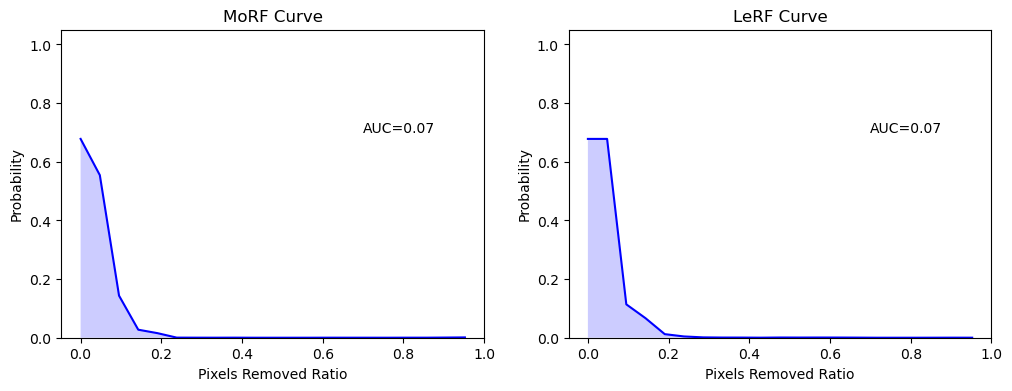

In [23]:

ml = MorfLerfClass(model)
ml.setExplanation(rec)
probeMorf, probeLerf = ml.evaluate(inputs)

showChapter(probeMorf, probeLerf)